In [1]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
a1_real = 0
a2_real = 3
d = 1
X = np.zeros(N)

for i in range(N):
    prob = rn.uniform(0,1)
    if prob <= 1/3:
        X[i] = rn.normalvariate(a1_real,d)
    else:
        X[i] = rn.normalvariate(a2_real,d)

print(X)


[ 2.00287219  1.94310201 -0.69303337  0.1134985   0.74829574 -0.2698183
  1.84125846 -0.67039056  1.47783267 -0.59630044  3.68802492 -2.420935
  2.57681911  2.35407798  1.24292765  3.38327375  0.30664864  2.57686543
  2.10332201  4.17961132  0.58901403  2.11932656  3.57324806  2.48821191
  0.87992301  0.38800492  2.27059554  3.47971547  3.33322573  1.7823191
  3.71883102  1.44646648  0.12544395  2.49917496  4.15847554 -0.23315382
  2.98767237  1.76951448  1.84504128  3.84178216 -0.18979074  1.72300553
 -1.02580167  4.26204729  2.45855724  3.3638462   1.94095689  1.95935801
  3.55045809 -0.3336329   0.7099118   2.85789134  3.0290873   2.32500554
  1.04191416 -0.45072548  3.99030678  1.60335343 -0.76958168  1.43576494
  2.00839186  0.40121774  2.93780285  0.77860202 -0.50719018  3.77582235
  0.19959228  4.1791229   3.78821275  0.68583803  3.11156033  1.79210642
  3.02709721  4.08597274  3.26499322  4.4712389   3.49914513  3.60770865
  4.93157696  3.44387037  2.4500806   1.58985947  2.541

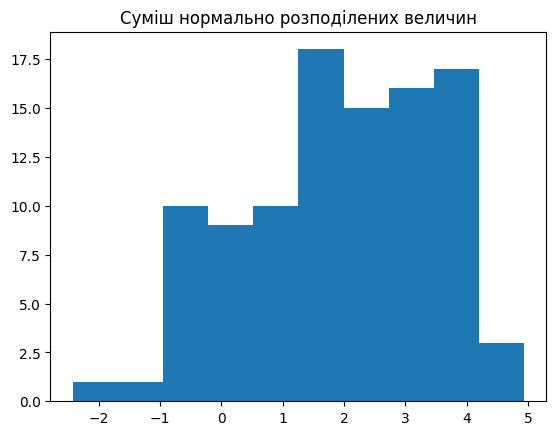

In [3]:
plt.hist([X[i] for i in range(N)])
plt.title("Суміш нормально розподілених величин")
plt.show()

![image](алгоритм.jpg)

In [4]:
def f(x,a):
    return 1/np.sqrt(2*np.pi)*np.exp(-(x-a)**2/2)

T = 10
p = np.zeros((T,2))
p[0] = [0.5,0.5]
a = np.zeros((T,2))
a[0] = [1,2]


for t in range(T-1):
    alpha = np.zeros((N,2))
    for i in range(N):
        denum = 0
        for k in range(2):  
            denum += p[t][k]*f(X[i],a[t][k])
        for k in range(2):
            alpha[i][k] = p[t][k]*f(X[i],a[t][k])/denum

    for k in range(2):
        for i in range(N):
            p[t+1][k] += alpha[i][k]/N
 
    for k in range(2):
        if k == 0:
            a_0 = [-1,0,1]
            whoargmax_0 = np.zeros(len(a_0))
            for j in range(len(a_0)):
                for i in range(N):
                    whoargmax_0[j] += alpha[i][k]*np.log(f(X[i],a_0[j]))
            a[t+1][0] = a_0[np.argmax(whoargmax_0)]
        else: 
            a_1 = [1,2,3]
            whoargmax_1 = np.zeros(len(a_1))
            for j in range(len(a_1)):
                for i in range(N):
                    whoargmax_1[j] += alpha[i][k]*np.log(f(X[i],a_1[j]))
            a[t+1][1] = a_1[np.argmax(whoargmax_1)]

    print(f"")

    if abs(p[t+1][0] - p[t][0]) < 0.001 and abs(p[t+1][1] - p[t][1]) < 0.001 and a[t+1][0] == a[t][0] and a[t+1][1] == a[t][1]:
        break
    


    